# Baseball Case Study

## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

* W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
* R – Runs scored: number of times a player crosses home plate
* AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction. The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out.
* H – Hit: reaching base because of a batted, fair ball without error by the defense
* 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
* 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
* HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
* BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.
* SO – Strikeout: number of batters who received strike three
* SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.
* RA – Run average: number of runs allowed times nine divided by innings pitched
* ER – Earned run: number of runs that did not occur as a result of errors or passed balls
* ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
* CG – Complete game: number of games where player was the only pitcher for their team
* SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win.
* SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
* E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
# cheking columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
# chenging column names
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs_Scored', 
                  'AB' : 'At_Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home_Runs', 
                  'BB' : 'Base_on_Balls', 
                  'SO' : 'Strike_Outs', 
                  'SB' : 'Stolen_Base',
                  'RA' : 'Runs_Average', 
                  'ER' : 'Earned_Runs', 
                 'ERA' : 'Earned_Run_Average', 
                  'CG' : 'Complete_Game',
                 'SHO' : 'Shut_Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [9]:
df.columns

Index(['Wins', 'Runs_Scored', 'At_Bat', 'Hits', 'Doubles', 'Triples',
       'Home_Runs', 'Base_on_Balls', 'Strike_Outs', 'Stolen_Base',
       'Runs_Average', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Game',
       'Shut_Outs', 'Saves', 'Errors'],
      dtype='object')

In [10]:
df.head()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


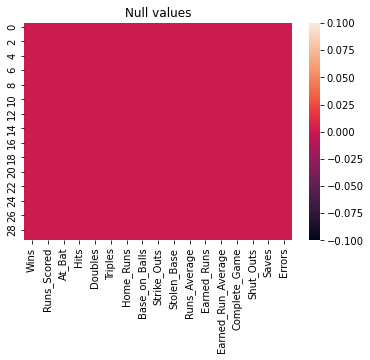

In [11]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [12]:
df.isnull().sum()

Wins                  0
Runs_Scored           0
At_Bat                0
Hits                  0
Doubles               0
Triples               0
Home_Runs             0
Base_on_Balls         0
Strike_Outs           0
Stolen_Base           0
Runs_Average          0
Earned_Runs           0
Earned_Run_Average    0
Complete_Game         0
Shut_Outs             0
Saves                 0
Errors                0
dtype: int64

#### We don't have any null value

In [13]:
df.describe()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


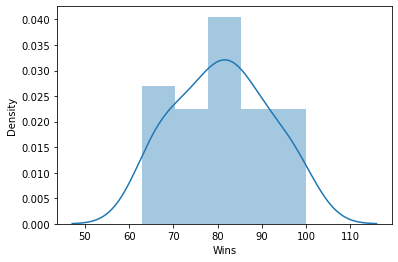

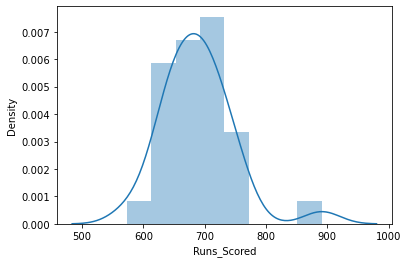

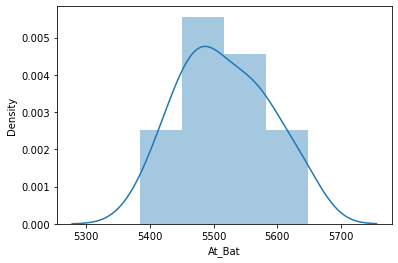

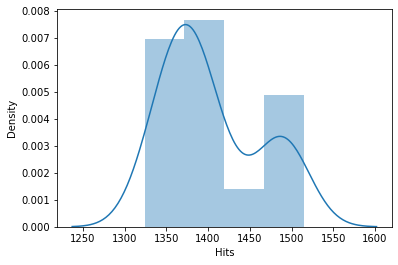

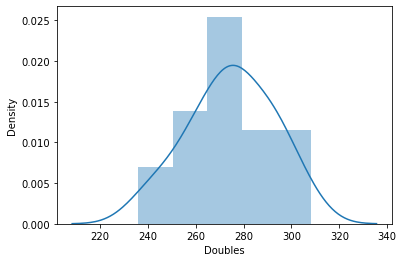

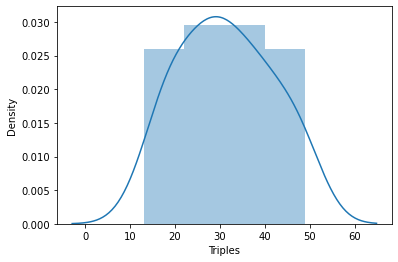

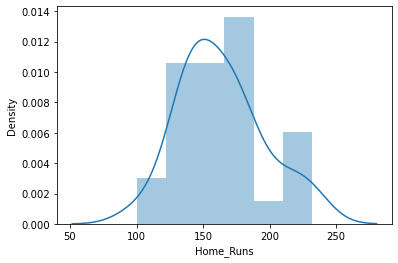

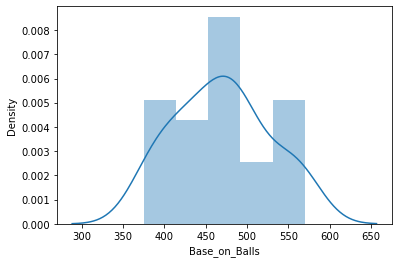

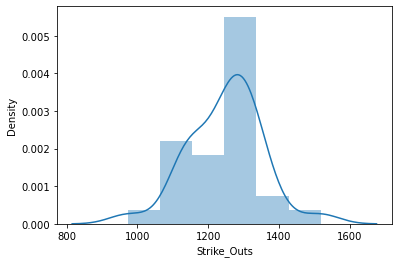

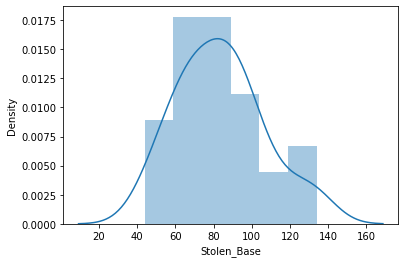

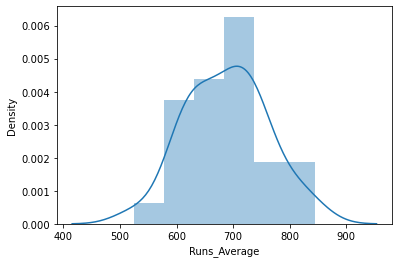

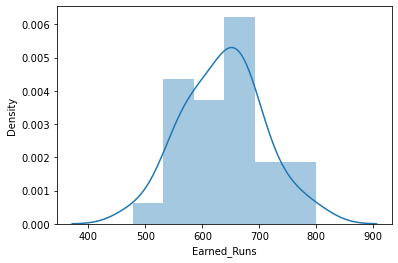

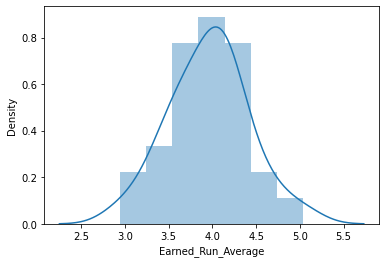

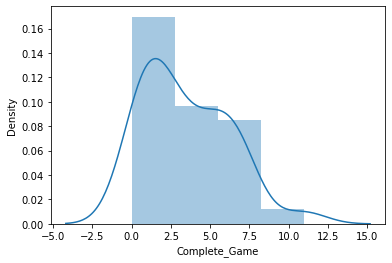

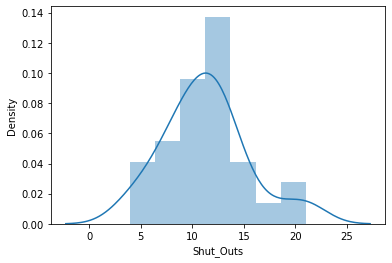

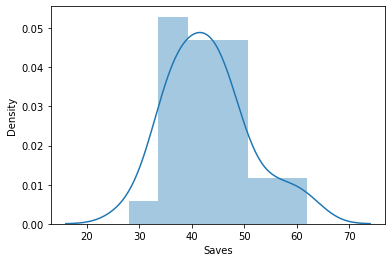

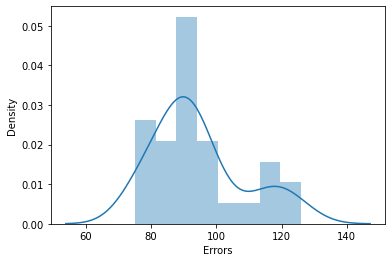

In [14]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
plt.show()

In [15]:
# Checking the skewness
df.skew()

Wins                  0.047089
Runs_Scored           1.200786
At_Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home_Runs             0.516441
Base_on_Balls         0.158498
Strike_Outs          -0.156065
Stolen_Base           0.479893
Runs_Average          0.045734
Earned_Runs           0.058710
Earned_Run_Average    0.053331
Complete_Game         0.736845
Shut_Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

* there are some skewness in data 
* we need to handle the skewness

* some of feature are either left or right skewed

## joint plot

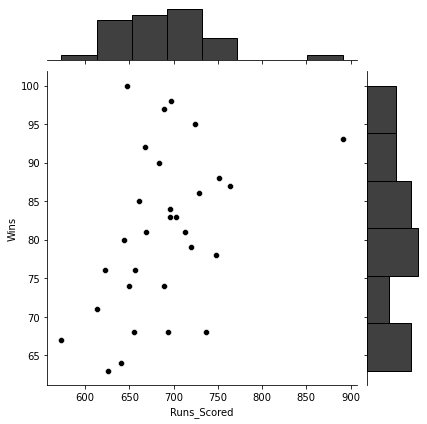

In [16]:
sns.jointplot(x="Runs_Scored", y="Wins", data=df, color="black")
plt.show()

* when run score is getting higher the chance also becoming higher to win

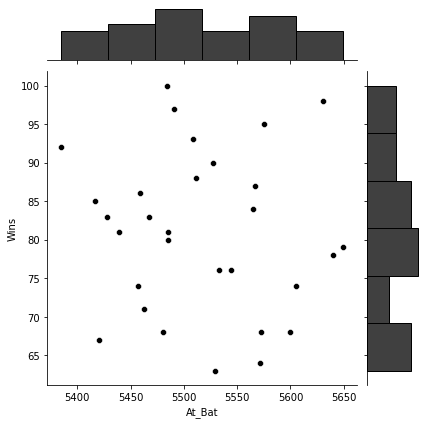

In [17]:
sns.jointplot(x="At_Bat",y="Wins",data=df,color="black")
plt.show()

* win is not perfectly depend on at bat

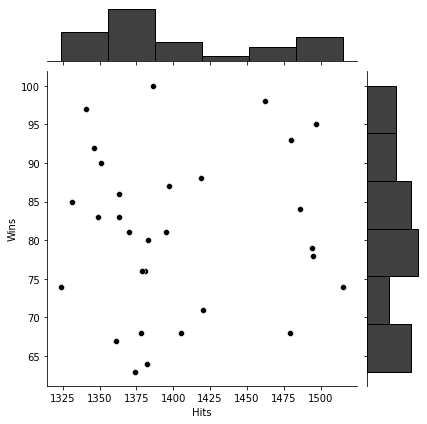

In [18]:
sns.jointplot(x="Hits",y="Wins",data=df,color="black")
plt.show()

* less the value of hits more the chance of wins

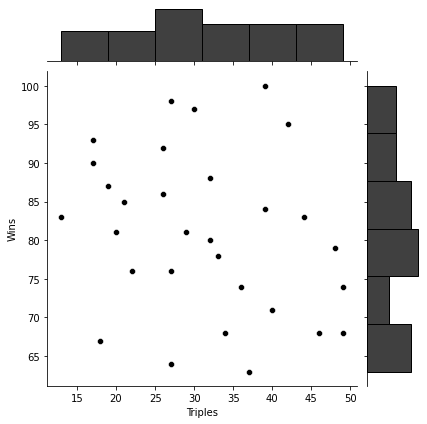

In [19]:
sns.jointplot(x="Triples",y="Wins",data=df,color="black")
plt.show()

* win is not perfectly depend on triples

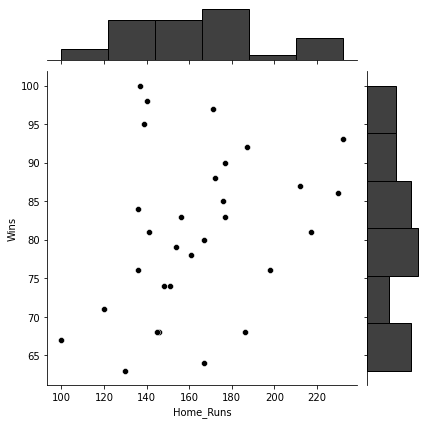

In [20]:
sns.jointplot(x="Home_Runs",y="Wins",data=df,color="black")
plt.show()

* home runs increase the chance of win littel bit

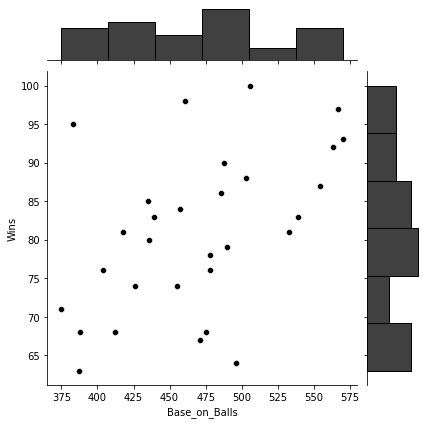

In [21]:
sns.jointplot(x="Base_on_Balls",y="Wins",data=df,color="black")
plt.show()

* If base on balls increase tha chances of win also increase

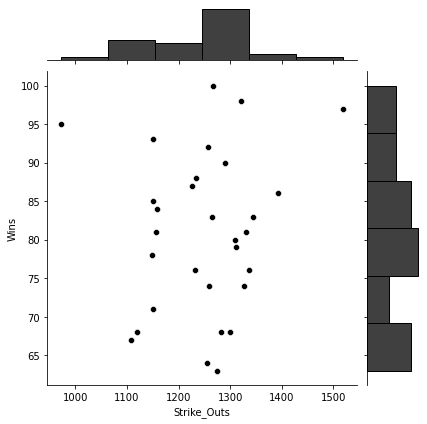

In [22]:
sns.jointplot(x="Strike_Outs",y="Wins",data=df,color="black")
plt.show()

* If strike outs in between 1100 to 1400 then the chance of win in higher

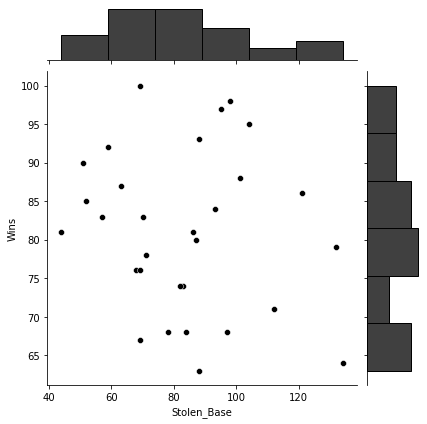

In [23]:
sns.jointplot(x="Stolen_Base",y="Wins",data=df,color="black")
plt.show()

* stolen base have negative inpact on win

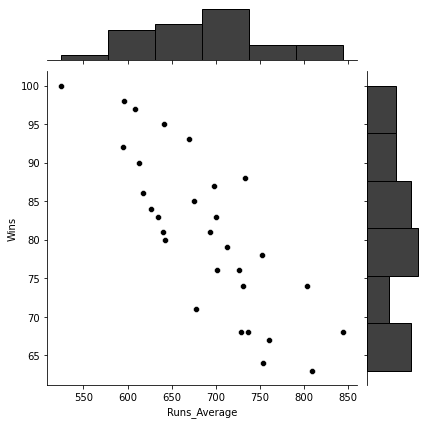

In [24]:
sns.jointplot(x="Runs_Average",y="Wins",data=df,color="black")
plt.show()

* runs average have negative inpact on win

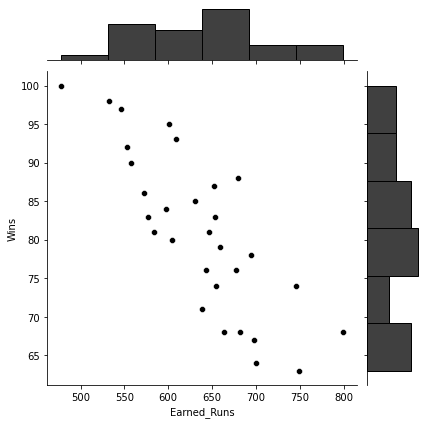

In [25]:
sns.jointplot(x="Earned_Runs",y="Wins",data=df,color="black")
plt.show()

* earned runs have negative on win

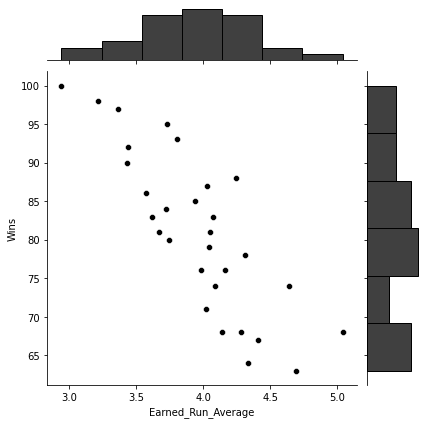

In [26]:
sns.jointplot(x="Earned_Run_Average",y="Wins",data=df,color="black")
plt.show()

* Earned Run Average have negative relationship with wins

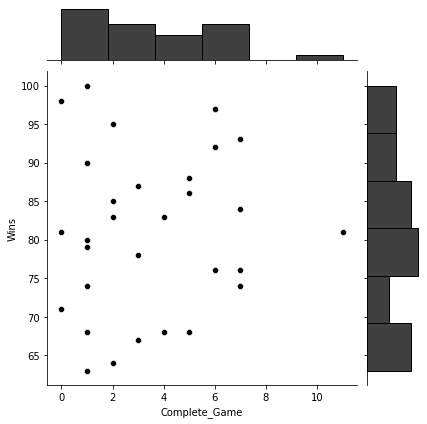

In [27]:
sns.jointplot(x="Complete_Game",y="Wins",data=df,color="black")
plt.show()

* possitive relationship between complete game and wins

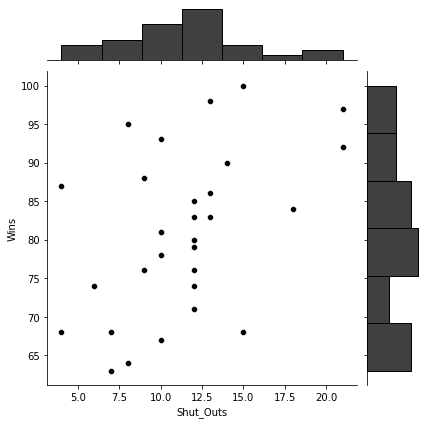

In [28]:
sns.jointplot(x="Shut_Outs",y="Wins",data=df,color="black")
plt.show()

* positively relationship with each other

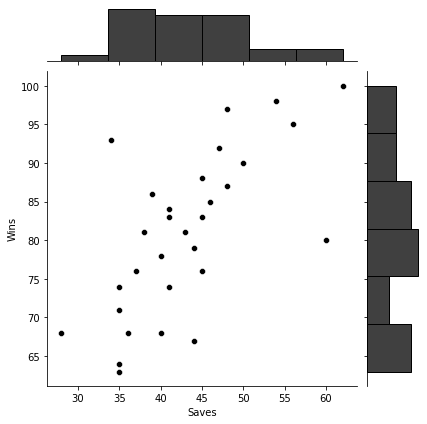

In [29]:
sns.jointplot(x="Saves",y="Wins",data=df,color="black")
plt.show()

* positively relationship with each other

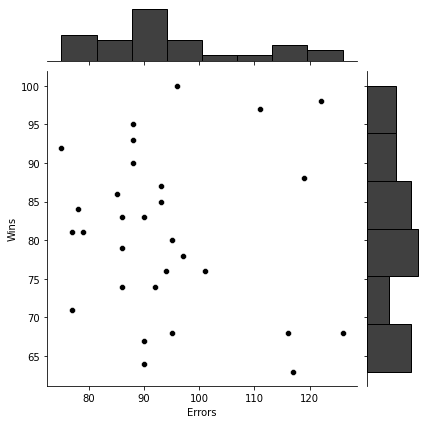

In [30]:
sns.jointplot(x="Errors",y="Wins",data=df,color="black")
plt.show()

* Errors is badly impacted on wins

## LM-Plot

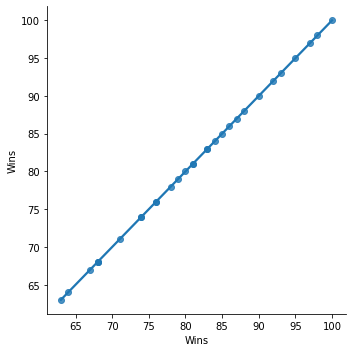

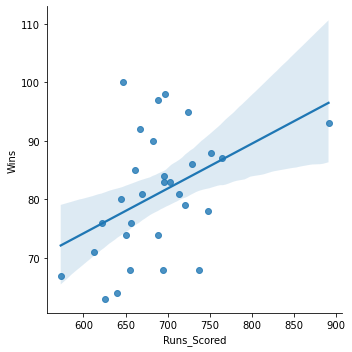

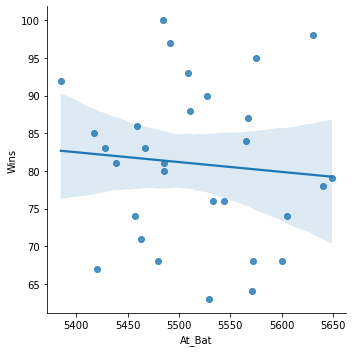

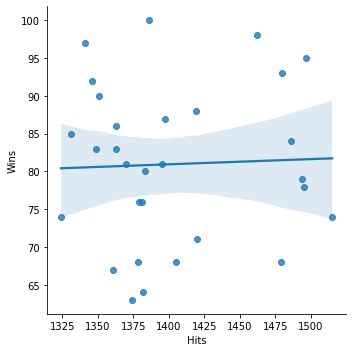

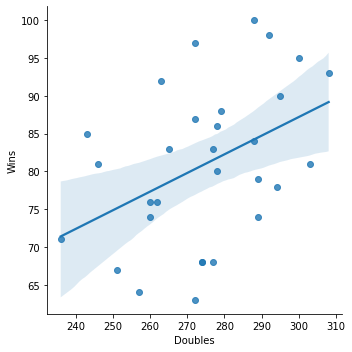

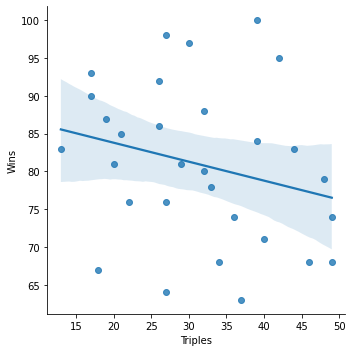

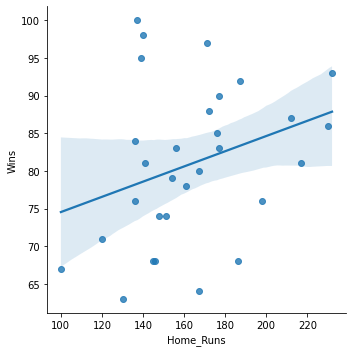

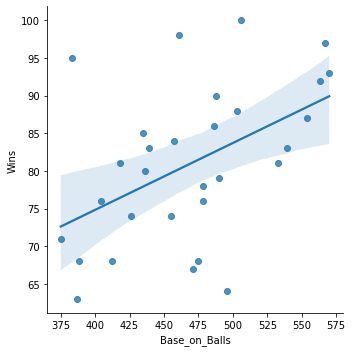

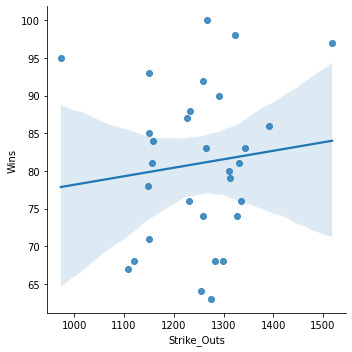

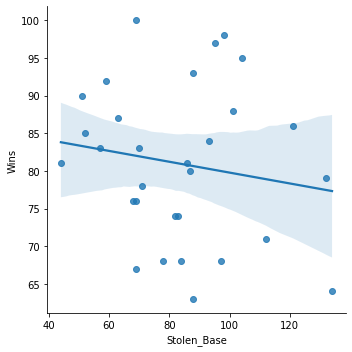

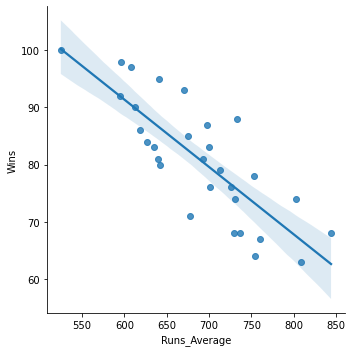

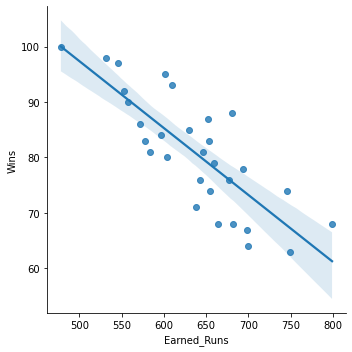

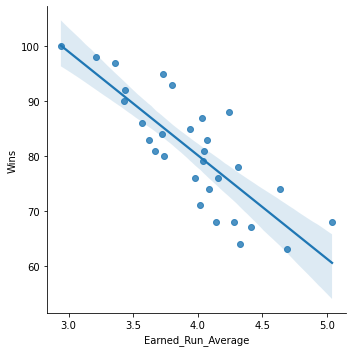

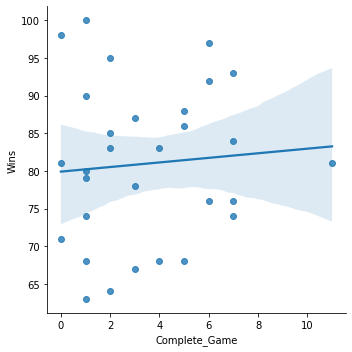

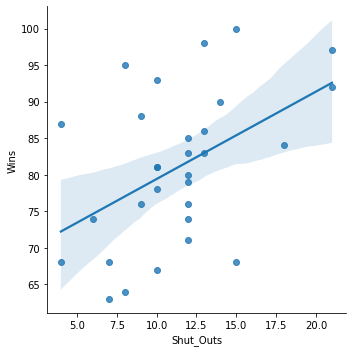

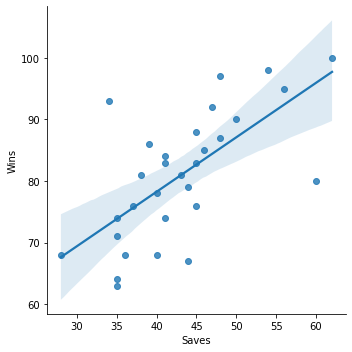

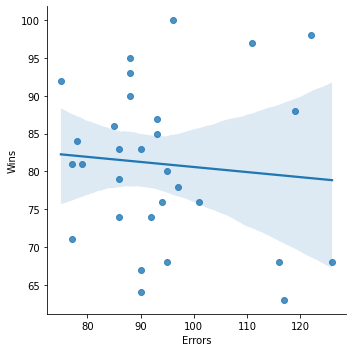

In [31]:
for i in df:
    sns.lmplot(x=i, y='Wins',data=df)

### Correlation

In [32]:
df.corr()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Base,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs_Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base_on_Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike_Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


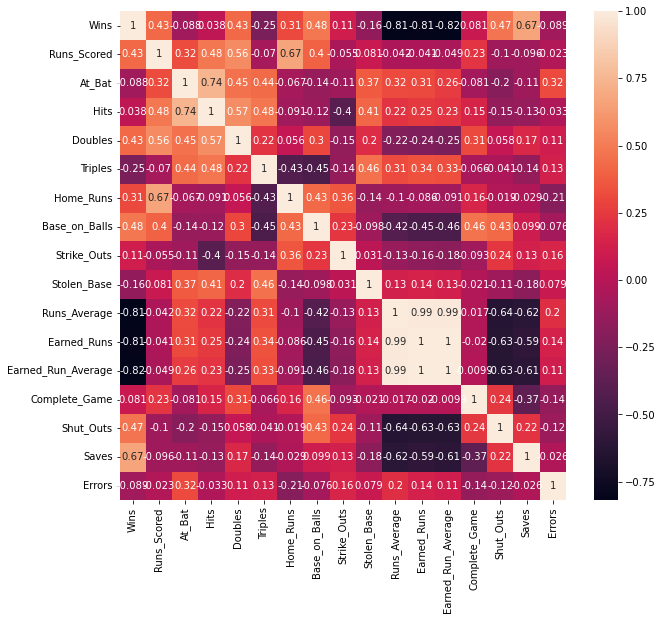

In [33]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

* As from the above heatmap we can conclude that feature like Earned Runs,Earned Run Average,Run Average are highly negative relative to our label 'Wins' and also they are also showing multicollearnity so it would be better to drop them here



In [34]:
df.drop(['Runs_Average','Earned_Runs','Earned_Run_Average'],axis=1,inplace=True)

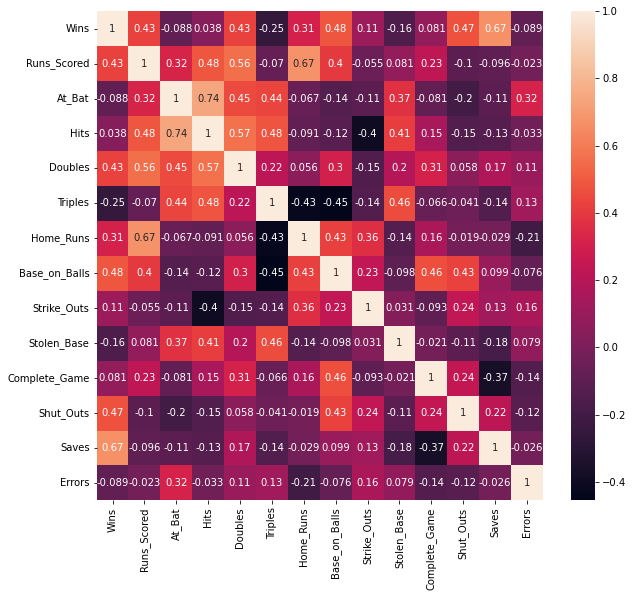

In [35]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

* We can see that we successfully drop the columns

## VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,585.020397,Wins
1,2589.267199,Runs_Scored
2,3543.990297,At_Bat
3,4160.945729,Hits
4,777.135039,Doubles
5,28.103316,Triples
6,232.660041,Home_Runs
7,255.806894,Base_on_Balls
8,325.896757,Strike_Outs
9,24.545406,Stolen_Base


* We can see that we successfully drop the columns


## Standard Scaler

In [37]:
x=df.drop('Wins',axis=1)
y=df['Wins']

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X=df.drop(columns=['Wins'])
Y=df['Wins']

In [44]:
scaler=StandardScaler()
x_scaler = scaler.fit_transform(x)

In [45]:
x_scaler

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.5398062 ,
        -0.81462859,  1.67160651, -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558, -0.5398062 ,
         0.1728    ,  0.24987932, -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918,  2.77264091,
        -0.32091429, -0.65485616, -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  1.3004422 ,
        -0.56777144, -0.78410408,  0.48575751],
       [ 0.01327008,  1.28073815,  1.98408098,  0.80189192,  1.72234737,
        -0.40377019, -0.25136033,  0.10586628, -0.02228984,  1.3004422 ,
         0.1728    , -1.04259994, -0.60719689],
       [ 3.50964704, -0.104883

* There are some multicollinearity
* When VIF values is more than 5 It's means there are some multicollinearity

## PCA

In [46]:
from sklearn.decomposition import PCA

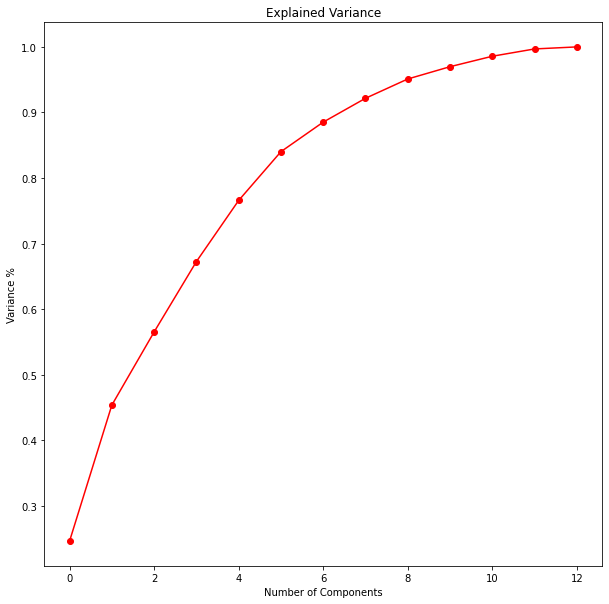

In [48]:
pca = PCA()
principalComponents = pca.fit_transform(x_scaler)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

* We can see around 95% of the variance is being explained by 8 components.

In [49]:
pca = PCA(n_components=8)
x_new = pca.fit_transform(x_scaler)

In [50]:
principle_x=pd.DataFrame(x_new,columns=np.arange(8))

Checking Multicollinearity after applying PCA


In [51]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7


* We can see that Multicollinearity issue is clear now.


## Model Building

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, y, random_state=42, test_size=.3)

In [53]:
print('X train:',X_train.shape)
print('Y train:',Y_train.shape)
print('X test:',X_test.shape)
print('Y test:',Y_test.shape)

X train: (21, 8)
Y train: (21,)
X test: (9, 8)
Y test: (9,)


In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train, Y_train)

LinearRegression()

In [58]:
Y_pred = lr.predict(X_test)

In [59]:
lr.score(X_train, Y_train)

0.8326967026495178

In [60]:
lr.score(X_test, Y_test)

0.5385147988279992